## **Import Libraries**

In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=69feb32360d8cee6169c2d4ff8bbaab86063c0612e7ab04c7d6e5ef46125d187
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession

# Initialize a Spark session
spark = SparkSession.builder.appName("EDA with PySpark").getOrCreate()

## **Data Loading:**

Loading data is the first step in any data analysis process. PySpark supports various data sources such as CSV files, Parquet files, and databases. Here's an example of loading data from a CSV file:

In [ ]:
# Load data from a CSV file
bank_df = spark.read.csv("/content/drive/MyDrive/bank.csv", header=True, inferSchema=True)

## **Data Exploration:**

Data exploration involves understanding the structure and content of the data. PySpark provides methods like show(), head(), and describe() for this purpose:

In [ ]:
# Display the first few rows of the DataFrame
bank_df.show()

+---+-------------+-------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+---+
|age|          job|marital|education|default|balance|housing|loan| contact|day|month|duration|campaign|pdays|previous|poutcome|  y|
+---+-------------+-------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+---+
| 30|   unemployed|married|  primary|     no|   1787|     no|  no|cellular| 19|  oct|      79|       1|   -1|       0| unknown| no|
| 33|     services|married|secondary|     no|   4789|    yes| yes|cellular| 11|  may|     220|       1|  339|       4| failure| no|
| 35|   management| single| tertiary|     no|   1350|    yes|  no|cellular| 16|  apr|     185|       1|  330|       1| failure| no|
| 30|   management|married| tertiary|     no|   1476|    yes| yes| unknown|  3|  jun|     199|       4|   -1|       0| unknown| no|
| 59|  blue-collar|married|secondary|     no|      0|    yes|  no| unknown| 

In [ ]:
# Display specific number of rows
bank_df.head(5)

[Row(age=30, job='unemployed', marital='married', education='primary', default='no', balance=1787, housing='no', loan='no', contact='cellular', day=19, month='oct', duration=79, campaign=1, pdays=-1, previous=0, poutcome='unknown', y='no'),
 Row(age=33, job='services', marital='married', education='secondary', default='no', balance=4789, housing='yes', loan='yes', contact='cellular', day=11, month='may', duration=220, campaign=1, pdays=339, previous=4, poutcome='failure', y='no'),
 Row(age=35, job='management', marital='single', education='tertiary', default='no', balance=1350, housing='yes', loan='no', contact='cellular', day=16, month='apr', duration=185, campaign=1, pdays=330, previous=1, poutcome='failure', y='no'),
 Row(age=30, job='management', marital='married', education='tertiary', default='no', balance=1476, housing='yes', loan='yes', contact='unknown', day=3, month='jun', duration=199, campaign=4, pdays=-1, previous=0, poutcome='unknown', y='no'),
 Row(age=59, job='blue-coll

In [ ]:
# Generate summary statistics of the DataFrame
bank_df.describe().show()

+-------+------------------+-------+--------+---------+-------+------------------+-------+----+--------+------------------+-----+------------------+------------------+------------------+------------------+--------+----+
|summary|               age|    job| marital|education|default|           balance|housing|loan| contact|               day|month|          duration|          campaign|             pdays|          previous|poutcome|   y|
+-------+------------------+-------+--------+---------+-------+------------------+-------+----+--------+------------------+-----+------------------+------------------+------------------+------------------+--------+----+
|  count|              4521|   4521|    4521|     4521|   4521|              4521|   4521|4521|    4521|              4521| 4521|              4521|              4521|              4521|              4521|    4521|4521|
|   mean| 41.17009511170095|   NULL|    NULL|     NULL|   NULL|1422.6578190665782|   NULL|NULL|    NULL|15.9152842291528

## **Data Filtering**
Filter the dataset to include only clients with a balance greater than 5000

In [ ]:
# Apply a filter to the data
filtered_bank_df = bank_df.filter(bank_df["balance"] > 5000)

In [ ]:
filtered_bank_df .show()

+---+-------------+--------+---------+-------+-------+-------+----+---------+---+-----+--------+--------+-----+--------+--------+---+
|age|          job| marital|education|default|balance|housing|loan|  contact|day|month|duration|campaign|pdays|previous|poutcome|  y|
+---+-------------+--------+---------+-------+-------+-------+----+---------+---+-----+--------+--------+-----+--------+--------+---+
| 39|     services| married|secondary|     no|   9374|    yes|  no|  unknown| 20|  may|     273|       1|   -1|       0| unknown| no|
| 41|   management| married| tertiary|     no|   5883|     no|  no| cellular| 20|  nov|     182|       2|   -1|       0| unknown| no|
| 38|   management|  single| tertiary|     no|  11971|    yes|  no|  unknown| 17|  nov|     609|       2|  101|       3| failure| no|
| 48|   management| married| tertiary|     no|   5887|     no|  no| cellular| 13|  aug|     227|       2|   -1|       0| unknown| no|
| 56|       admin.| married|secondary|     no|  16873|     no|

## **Column Operations**

Extract the month from the 'month' column and create a new column for the quarter of the year.

In [ ]:
# Define a mapping from month names to quarter numbers
month_to_quarter = {
    "jan": 1, "feb": 1, "mar": 1,
    "apr": 2, "may": 2, "jun": 2,
    "jul": 3, "aug": 3, "sep": 3,
    "oct": 4, "nov": 4, "dec": 4}

In [ ]:
# Create a new column for the quarter of the year
from pyspark.sql.functions import col, when
bank_data = filtered_bank_df.withColumn("quarter",
    when(col("month").isin("jan", "feb", "mar"), 1)
    .when(col("month").isin("apr", "may", "jun"), 2)
    .when(col("month").isin("jul", "aug", "sep"), 3)
    .when(col("month").isin("oct", "nov", "dec"), 4))

bank_data.show()

+---+-------------+--------+---------+-------+-------+-------+----+---------+---+-----+--------+--------+-----+--------+--------+---+-------+
|age|          job| marital|education|default|balance|housing|loan|  contact|day|month|duration|campaign|pdays|previous|poutcome|  y|quarter|
+---+-------------+--------+---------+-------+-------+-------+----+---------+---+-----+--------+--------+-----+--------+--------+---+-------+
| 39|     services| married|secondary|     no|   9374|    yes|  no|  unknown| 20|  may|     273|       1|   -1|       0| unknown| no|      2|
| 41|   management| married| tertiary|     no|   5883|     no|  no| cellular| 20|  nov|     182|       2|   -1|       0| unknown| no|      4|
| 38|   management|  single| tertiary|     no|  11971|    yes|  no|  unknown| 17|  nov|     609|       2|  101|       3| failure| no|      4|
| 48|   management| married| tertiary|     no|   5887|     no|  no| cellular| 13|  aug|     227|       2|   -1|       0| unknown| no|      3|
| 56| 

## **GroupBy and Aggregation:**

Group the data by job type and calculate the average balance and median age for each job category.

Find the total number of clients for each marital status who have subscribed to a term deposit.


In [ ]:
# Perform a groupBy operation
from pyspark.sql.functions import avg, col, expr, percentile_approx

# Group by job and calculate the average balance
avg_balance_df = bank_data.groupBy("job").agg(avg("balance").alias("average_balance"))

# Calculate the median age
# percentile_approx function is used to approximate the median
median_age_df = bank_data.groupBy("job").agg(percentile_approx("age", 0.5).alias("median_age"))

# Join the two DataFrames on the job column
result_df = avg_balance_df.join(median_age_df, on="job")

# Show the result
result_df.show()

+-------------+------------------+----------+
|          job|   average_balance|median_age|
+-------------+------------------+----------+
|   management| 9824.808510638299|        41|
|      retired|12160.777777777777|        59|
|      unknown| 6864.666666666667|        30|
|self-employed| 8974.666666666666|        40|
|      student| 8226.222222222223|        27|
|  blue-collar| 8436.613636363636|        42|
| entrepreneur|           13584.0|        38|
|       admin.| 9954.157894736842|        41|
|   technician| 8922.867924528302|        38|
|     services| 9361.947368421053|        40|
|    housemaid|12417.923076923076|        48|
|   unemployed|            7589.0|        36|
+-------------+------------------+----------+



## **Use UDF to Categorize Age Groups:**

Write a UDF that categorizes clients into age groups ('<30', '30-60', '>60') and apply it to create a new column age_group.


In [ ]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

In [ ]:
# Define a UDF to categorize age groups
def categorize_age(age):
    if age < 30:
        return '<30'
    elif 30 <= age <= 60:
        return '30-60'
    else:
        return '>60'

# Register the UDF
categorize_age_udf = udf(categorize_age, StringType())

In [ ]:
# Apply the UDF to create a new column 'age_group'
udf_df = bank_data.withColumn("age_group", categorize_age_udf(bank_data["age"]))

# Show the result
udf_df.show()

+---+-------------+--------+---------+-------+-------+-------+----+---------+---+-----+--------+--------+-----+--------+--------+---+-------+---------+
|age|          job| marital|education|default|balance|housing|loan|  contact|day|month|duration|campaign|pdays|previous|poutcome|  y|quarter|age_group|
+---+-------------+--------+---------+-------+-------+-------+----+---------+---+-----+--------+--------+-----+--------+--------+---+-------+---------+
| 39|     services| married|secondary|     no|   9374|    yes|  no|  unknown| 20|  may|     273|       1|   -1|       0| unknown| no|      2|    30-60|
| 41|   management| married| tertiary|     no|   5883|     no|  no| cellular| 20|  nov|     182|       2|   -1|       0| unknown| no|      4|    30-60|
| 38|   management|  single| tertiary|     no|  11971|    yes|  no|  unknown| 17|  nov|     609|       2|  101|       3| failure| no|      4|    30-60|
| 48|   management| married| tertiary|     no|   5887|     no|  no| cellular| 13|  aug| 

## **Advanced Data Transformations:**

Calculate the subscription rate (percentage of clients who subscribed to a term deposit) for each education level.

Identify the top 3 professions that have the highest loan default rate.


In [ ]:
from pyspark.sql.functions import col, count, expr

In [ ]:
# Calculate the subscription rate (percentage of clients who subscribed to a term deposit) for each education level
subscription_rate_df = bank_data.groupBy("education").agg(
    (count(when(col("y") == "yes", True)) / count("*") * 100).alias("subscription_rate")
)

# Show the subscription rate by education level
subscription_rate_df.show()

+---------+------------------+
|education| subscription_rate|
+---------+------------------+
|  unknown| 11.11111111111111|
| tertiary|           14.0625|
|secondary| 7.563025210084033|
|  primary|11.363636363636363|
+---------+------------------+



In [ ]:
# Calculate loan default rate (percentage of clients who defaulted on a loan) for each job
loan_default_rate_df = bank_data.groupBy("job").agg(
    (count(when(col("loan") == "yes", True)) / count("*") * 100).alias("default_rate")
)

# Show the loan default rate by education level
loan_default_rate_df.show()

+-------------+------------------+
|          job|      default_rate|
+-------------+------------------+
|   management| 6.382978723404255|
|      retired|7.4074074074074066|
|      unknown|               0.0|
|self-employed|               0.0|
|      student|               0.0|
|  blue-collar|13.636363636363635|
| entrepreneur| 8.333333333333332|
|       admin.| 26.31578947368421|
|   technician| 5.660377358490567|
|     services| 5.263157894736842|
|    housemaid|7.6923076923076925|
|   unemployed|               0.0|
+-------------+------------------+



In [ ]:
# Identify the top 3 professions with the highest loan default rate
top_3_default_jobs = loan_default_rate_df.orderBy(col("default_rate").desc()).limit(3)

# Show the top 3 professions with the highest loan default rate
top_3_default_jobs.show()

+------------+------------------+
|         job|      default_rate|
+------------+------------------+
|      admin.| 26.31578947368421|
| blue-collar|13.636363636363635|
|entrepreneur| 8.333333333333332|
+------------+------------------+



## **String Manipulation and Date Functions:**

Concatenate the 'job' and 'marital' columns into a new column 'job_marital'.

Use string functions to convert the 'contact' column to uppercase.


In [ ]:
from pyspark.sql.functions import concat, col, lit, upper

In [ ]:
# Concatenate 'job' and 'marital' columns into a new column 'job_marital'
df = bank_data.withColumn("job_marital", concat(col("job"), lit("_"), col("marital")))

# Convert the 'contact' column to uppercase
df = df.withColumn("contact", upper(col("contact")))

# Show the result
df.show()

+---+-------------+--------+---------+-------+-------+-------+----+---------+---+-----+--------+--------+-----+--------+--------+---+-------+--------------------+
|age|          job| marital|education|default|balance|housing|loan|  contact|day|month|duration|campaign|pdays|previous|poutcome|  y|quarter|         job_marital|
+---+-------------+--------+---------+-------+-------+-------+----+---------+---+-----+--------+--------+-----+--------+--------+---+-------+--------------------+
| 39|     services| married|secondary|     no|   9374|    yes|  no|  UNKNOWN| 20|  may|     273|       1|   -1|       0| unknown| no|      2|    services_married|
| 41|   management| married| tertiary|     no|   5883|     no|  no| CELLULAR| 20|  nov|     182|       2|   -1|       0| unknown| no|      4|  management_married|
| 38|   management|  single| tertiary|     no|  11971|    yes|  no|  UNKNOWN| 17|  nov|     609|       2|  101|       3| failure| no|      4|   management_single|
| 48|   management| ma

## **Data Visualization**

Convert the Spark DataFrame to a Pandas DataFrame.

Create a bar plot showing the count of clients by job type.


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql.functions import col

In [ ]:
# Convert Spark DataFrame to Pandas DataFrame
pandas_bank_df = bank_data.toPandas()

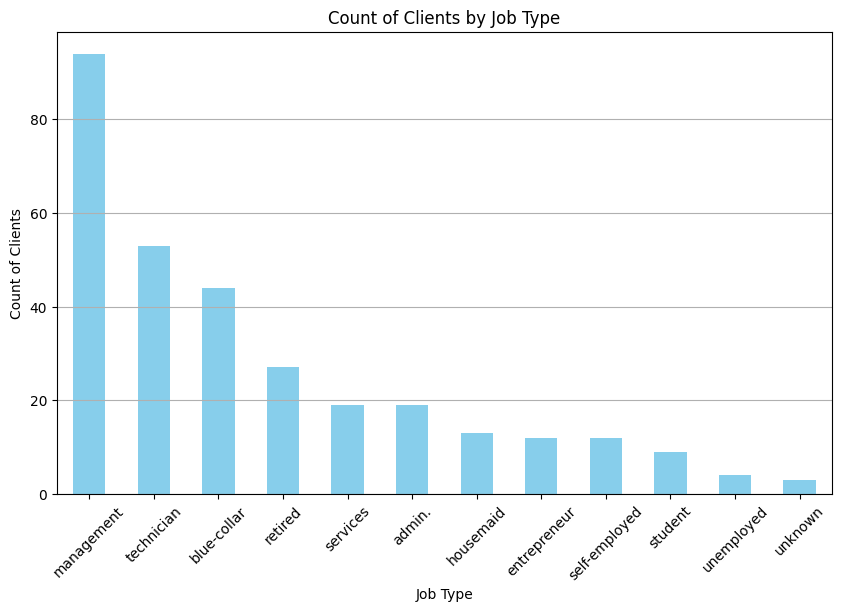

In [ ]:
# Create a bar plot showing the count of clients by job type
job_counts = pandas_bank_df['job'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
job_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Clients by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Count of Clients')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.show()

## **Complex Queries for Insights:**

Analyze which month of the year has the highest number of clients contacted, and determine the success rate of the campaign in that month.

Find the average duration of contact for clients who subscribed versus those who did not.


In [ ]:
# 1. Determine which month has the highest number of clients contacted
month_contacted_counts = bank_data.groupBy("month").agg(count("*").alias("num_contacts")).orderBy(col("num_contacts").desc())
month_with_max_contacts = month_contacted_counts.first()["month"]

In [ ]:
# 2. Calculate the success rate of the campaign in that month
month_df = bank_data.filter(col("month") == month_with_max_contacts)
success_rate = month_df.groupBy("month").agg(
    (count(when(col("y") == "yes", True)) / count("*") * 100).alias("success_rate")
)


In [ ]:
# Show the month with the highest number of contacts and its success rate
month_contacted_counts.show()
success_rate.show()

+-----+------------+
|month|num_contacts|
+-----+------------+
|  may|          69|
|  nov|          67|
|  jun|          48|
|  aug|          45|
|  apr|          20|
|  jul|          18|
|  feb|          13|
|  mar|           8|
|  oct|           8|
|  jan|           5|
|  sep|           4|
|  dec|           4|
+-----+------------+

+-----+-----------------+
|month|     success_rate|
+-----+-----------------+
|  may|7.246376811594203|
+-----+-----------------+



In [ ]:
# 3. Find the average duration of contact for clients who subscribed versus those who did not
average_duration_df = bank_data.groupBy("y").agg(
    avg("duration").alias("average_duration")
)

# Show the average duration for subscribed and not subscribed clients
average_duration_df.show()

+---+-----------------+
|  y| average_duration|
+---+-----------------+
| no|           218.36|
|yes|425.2352941176471|
+---+-----------------+



## **Correlation Between Age and Balance:**

Calculate the correlation coefficient between 'age' and 'balance' to see if there’s any linear relationship between these two variables.


In [ ]:
# Calculate the correlation coefficient between 'age' and 'balance'
correlation = bank_data.stat.corr("age", "balance")

# Show the result
print(f"The correlation coefficient between 'age' and 'balance' is: {correlation}")

The correlation coefficient between 'age' and 'balance' is: 0.10055047932417704


## **Exploring Loan Defaults:**

Analyze the proportion of clients with and without a credit default and visualize the count of defaulters and non-defaulters.


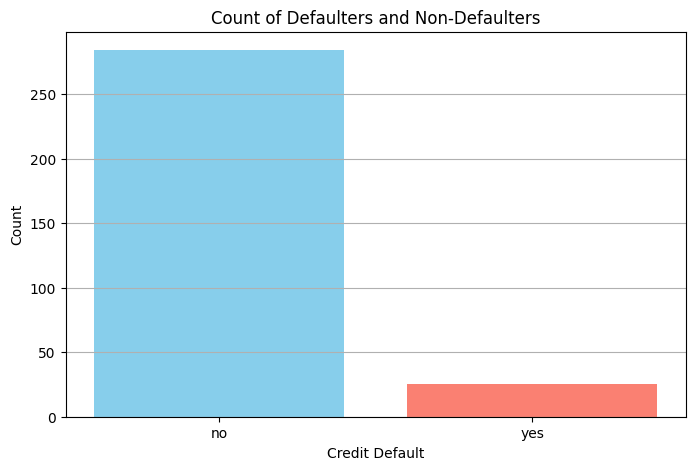

In [ ]:
# Calculate the proportion of clients with and without a credit default
default_proportion_df = bank_data.groupBy("loan").agg(
    count("*").alias("count")
)

# Convert Spark DataFrame to Pandas DataFrame for visualization
default_proportion_pdf = default_proportion_df.toPandas()

# Visualize the count of defaulters and non-defaulters
plt.figure(figsize=(8, 5))
plt.bar(default_proportion_pdf["loan"], default_proportion_pdf["count"], color=['skyblue', 'salmon'])
plt.title('Count of Defaulters and Non-Defaulters')
plt.xlabel('Credit Default')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')

## **Contact Method Analysis:**

Investigate which contact method ('cellular', 'telephone', etc.) has the highest success rate for term deposit subscriptions.


In [ ]:
# Filter data for term deposit subscriptions and non-unknown contact methods
term_deposit_df = df.filter((col("y") == "yes") & (col("contact") != "unknown"))

# Calculate success rate for each contact method
success_rate_df = term_deposit_df.groupBy("contact").agg(
    (count(when(col("y") == "yes", True)) / count("*") * 100).alias("success_rate")
)

# Identify contact method with the highest success rate
highest_success_rate = success_rate_df.orderBy(col("success_rate").desc()).first()

# Show the result
print(f"The contact method with the highest success rate for term deposit subscriptions is: {highest_success_rate['contact']}")
print(f"Success rate: {highest_success_rate['success_rate']}%")

The contact method with the highest success rate for term deposit subscriptions is: CELLULAR
Success rate: 100.0%


## **Data Processing with Spark SQL:**

Calculate the average account balance for different age groups or the most common job types. (Use CREATE TEMPORARY VIEW in Spark SQL to query data using SQL syntax.)


In [ ]:
# Create a temporary view
bank_data.createOrReplaceTempView("bank")

# Calculate the average account balance for different age groups
age_balance_avg = spark.sql("""
    SELECT
        CASE
            WHEN age < 30 THEN 'Under 30'
            WHEN age BETWEEN 30 AND 60 THEN '30-60'
            ELSE 'Over 60'
        END AS age_group,
        AVG(balance) AS avg_balance
    FROM
        bank
    GROUP BY
        age_group
    ORDER BY
        age_group
""")

age_balance_avg.show()

# Calculate the most common job types
common_jobs = spark.sql("""
    SELECT
        job,
        COUNT(*) AS count
    FROM
        bank
    GROUP BY
        job
    ORDER BY
        count DESC
    LIMIT 5
""")

common_jobs.show()

+---------+-----------------+
|age_group|      avg_balance|
+---------+-----------------+
|    30-60|9774.398523985239|
|  Over 60|          10392.5|
| Under 30|           9209.9|
+---------+-----------------+

+-----------+-----+
|        job|count|
+-----------+-----+
| management|   94|
| technician|   53|
|blue-collar|   44|
|    retired|   27|
|   services|   19|
+-----------+-----+

